In [114]:
# Library imports
import numpy as np
import numpy.linalg as la
import matplotlib.pyplot as plt
# import warnings

# File imports
from k_means import *
from gmm import *

# Example GMM and K-Means with Libraries

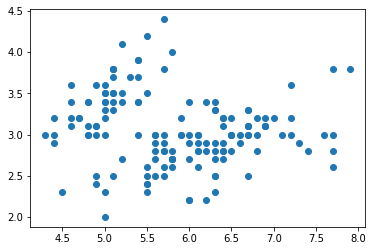

In [2]:
import pandas as pd
from pandas import DataFrame
from sklearn import datasets
from sklearn.mixture import GaussianMixture
from sklearn.cluster import KMeans
 
# load the iris dataset
iris = datasets.load_iris()
 
# select first two columns 
X = iris.data[:, :2]
 
# turn it into a dataframe
d = pd.DataFrame(X)
 
# plot the data
plt.scatter(d[0], d[1])
plt.show()

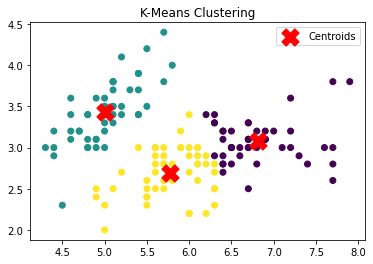

In [3]:
d = pd.DataFrame(X)

# Apply k-means clustering
kmeans = KMeans(n_clusters=3, n_init='auto')  # Assuming you want to divide the data into 3 clusters
kmeans.fit(X)
labels = kmeans.labels_

# Add the cluster labels to the DataFrame
d['Cluster'] = labels

# Plot the data with different colors for each cluster
plt.scatter(d[0], d[1], c=d['Cluster'], cmap='viridis')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=300, c='red', marker='X', label='Centroids')
plt.title('K-Means Clustering')
plt.legend()
plt.show()

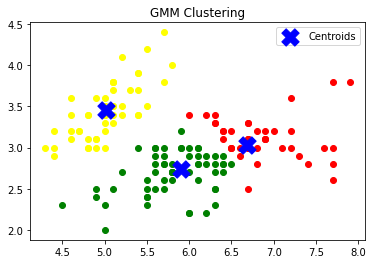

In [4]:
d = pd.DataFrame(X)

# Fit the GMM model for the dataset 
gmm = GaussianMixture(n_components = 3)
gmm.fit(d)
 
# Assign a label to each sample
labels = gmm.predict(d)
d['labels']= labels
d0 = d[d['labels']== 0]
d1 = d[d['labels']== 1]
d2 = d[d['labels']== 2]
 
# plot three clusters in same plot

plt.scatter(d0[0], d0[1], c ='r')
plt.scatter(d1[0], d1[1], c ='yellow')
plt.scatter(d2[0], d2[1], c ='g')

plt.scatter(gmm.means_[:, 0], gmm.means_[:, 1], s=300, c='blue', marker='X', label='Centroids')
plt.title('GMM Clustering')
plt.legend()
plt.show()

# Our K-Means

Iteration at breakage: 7


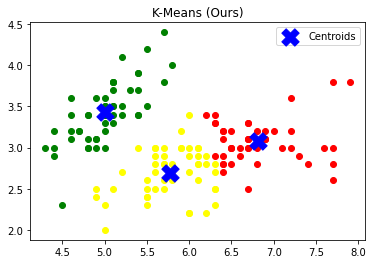

In [96]:
# Run K-Means++
num_classes, num_dimensions = 3, 2
init_c = kmeans_plusplus_initialization(X, num_classes)
means, points = k_means(X, init_c)

# Display the points in respective class
colors = ['red', 'yellow', 'green', 'blue']
for k in range(num_classes):
    for point in points[k]:
        plt.scatter(point[0], point[1], c=colors[k])

# Visualization Stuff
plt.scatter(means[:, 0], means[:, 1], s=300, c='blue', marker='X', label='Centroids')
plt.title("K-Means (Ours)")
plt.legend()
plt.show()

# Our GMM Code

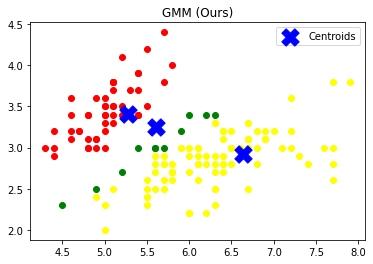

In [115]:
num_classes = 3
n, d = X.shape
posteriors, means, covs, priors = GMM(X, num_classes, 50)

# Give assignment for each point
assignments = np.zeros(n, dtype=int)
for i in range(n):
    assignments[i] = np.argmax(posteriors[i])
    
# Put point into class list
class_points = [[] for _ in range(num_classes)]
for i, assignment in enumerate(assignments):
    class_points[assignment].append(X[i])
    
# Display the points in respective class
colors = ['red', 'yellow', 'green', 'blue']
for k in range(num_classes):
    points = np.array(class_points[k])
    if len(points) == 0:
        print("Problem there are 0 points for class", k)
        continue

    plt.scatter(points[:, 0], points[:, 1], c=colors[k])
plt.scatter(means[:, 0], means[:, 1], s=300, c='blue', marker='X', label='Centroids')
    
plt.title("GMM (Ours)")
plt.legend()
plt.show()